# Table of Galaxy Groups Below 3500 $km s^{-1}$
 
Info on table https://iopscience.iop.org/article/10.3847/1538-4357/aa76db#apjaa76dbt2 (table 2)

Got code and file from: https://github.com/DESI-UR/DESI_SGA/blob/master/TF/apjaa7dbt2_mrt.ipynb

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from astropy.table import Table
from astropy.coordinates import SkyCoord

from astropy import constants as const
from astropy import units as u


In [2]:
mpl.rc('font', size=14)

## Importing Dwarf Galaxy Table

In [3]:
dwarf_table = Table.read('dwarf_table.txt', format = 'ascii.commented_header')
dwarf_table[:5]

aimc,IN_DR7_LSS,RA,DEC,Z,ELPETRO_ABSMAG_r,u_r,sSFR,HImass,flag3727,t3,Z12logOH,Zerr,logNO,NOerr,vflag_VF,ID,2D_neighbor_ID,2D_neighbor_dist,2D_neighbor_ID_vir,2D_neighbor_dist_vir,3D_neighbor_ID,3D_neighbor_dist,3D_neighbor_ID_vir,3D_neighbor_dist_vir
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,int32,int32,float64,int32,float64,int32,float64,int32,float64
0.0,1.0,147.17645340393182,-0.3540349522432606,0.006282840855419636,-15.534673690795898,1.5979467332363129,-9.897252082824707,nan,nan,nan,nan,nan,nan,nan,2,12,49,0.18150554228021565,585714,1.3634632510011546,573,0.3210655024172438,208,2.3657856725525463
106.68,1.0,146.85676432411947,-0.27409664376066756,0.02196459472179413,-16.7003231048584,1.6220477223396301,-9.639364242553711,nan,nan,nan,nan,nan,nan,nan,2,31,79,0.6704515586457357,92,2.414294367856323,80,0.9556330809587631,585700,3.7385754919749274
0.0,1.0,146.19277353258968,-0.6882589506846374,0.004080323036760092,-15.290872573852539,1.220979243516922,-9.548693656921387,nan,nan,nan,nan,nan,nan,nan,2,44,585695,0.035663331434249095,639857,0.46035331496314846,585695,0.221530846641702,585695,2.8927174640703734
199.39,1.0,146.00780426178756,-0.6422574964819474,0.004776299931108952,-15.831652641296387,0.7728094607591629,-7.982375621795654,nan,0.0,1.5717060395681055,7.73051787768279,0.0179600111522654,-0.5320566539047968,0.44255404846002694,2,45,585695,0.006393284307917346,585695,0.08348257342324528,639857,0.6010801341408164,639857,7.109919536505821
0.0,1.0,146.6190367018052,-0.43434631860351913,0.006036635022610426,-16.34455108642578,1.7559601366519928,-9.769034385681152,nan,nan,nan,nan,nan,nan,nan,2,49,585714,0.07059729101415332,585714,0.4172620229334301,585714,0.3596492056527832,585714,2.125689993784549


## Reading in Groups Data

In [4]:
groups = Table.read(r'C:\Users\caeho\OneDrive\Documents\University of Rochester REU\apjaa76dbt2_mrt.txt',
                    format='ascii.fixed_width_no_header',
                    names=['PGC1', 'PGC1+', 'Mem', 'GLON', 'GLAT', 'SGL', 'SGB', 'Ksmag', 'logK', 'Vh', 'VLS', 'ND', 'D', 'errD', 'sigmaL', 'sigmaV', 'R2t', 'Rg', 'logMk', 'logMd'],
                    col_starts=np.asarray([1, 9, 17, 21, 30, 39, 48, 57, 63, 69, 74, 79, 83, 89, 92, 96, 100, 106, 112, 119])-1,
                   )

In [5]:
groups

PGC1,PGC1+,Mem,GLON,GLAT,SGL,SGB,Ksmag,logK,Vh,VLS,ND,D,errD,sigmaL,sigmaV,R2t,Rg,logMk,logMd
int32,int32,int32,float64,float64,float64,float64,float64,float64,int32,int32,int32,float64,int32,int32,int32,float64,float64,float64,float64
43296,43296,191,302.2241,21.6465,156.3251,-11.5819,4.61,12.71,3407,3142,59,36.96,3,595,800,1.612,0.893,14.624,14.717
46618,43296,30,307.8738,19.2865,159.6426,-6.8008,6.07,12.11,3340,3086,5,37.57,7,350,307,0.95,0.745,13.936,13.808
45174,43296,34,306.0424,32.5707,146.1941,-6.0422,6.42,11.96,3292,3059,4,44.03,8,307,300,0.833,0.693,13.764,13.756
40498,43296,24,297.5648,23.0823,153.9019,-15.4648,6.48,11.92,3258,2986,4,28.45,6,296,170,0.801,0.607,13.713,13.207
43557,43296,22,302.9333,36.4075,141.8602,-7.7062,6.82,11.81,3296,3066,7,39.89,8,267,163,0.724,0.428,13.582,13.017
46409,43296,12,307.9495,14.9305,163.9909,-7.402,6.96,11.7,3148,2889,4,33.18,8,243,174,0.659,0.399,13.459,13.045
45466,43296,22,307.803,38.9261,140.2186,-3.4022,7.42,11.48,2995,2783,2,38.06,12,201,118,0.544,0.444,13.21,12.747
49424,43296,7,313.8107,13.0725,166.6082,-2.0176,7.43,11.41,2833,2591,1,33.88,18,189,130,0.513,0.391,13.134,12.782
49106,43296,8,312.8342,12.8475,166.7144,-2.9897,7.65,11.4,3066,2820,1,30.06,18,187,97,0.507,0.204,13.117,12.243


### Adding ID number like I had for NSA galaxy table

In [6]:
#Adding ID number like I had for NSA galaxy table

groups['ID'] = [i for i in range(len(groups))]
groups[:5]



PGC1,PGC1+,Mem,GLON,GLAT,SGL,SGB,Ksmag,logK,Vh,VLS,ND,D,errD,sigmaL,sigmaV,R2t,Rg,logMk,logMd,ID
int32,int32,int32,float64,float64,float64,float64,float64,float64,int32,int32,int32,float64,int32,int32,int32,float64,float64,float64,float64,int32
43296,43296,191,302.2241,21.6465,156.3251,-11.5819,4.61,12.71,3407,3142,59,36.96,3,595,800,1.612,0.893,14.624,14.717,0
46618,43296,30,307.8738,19.2865,159.6426,-6.8008,6.07,12.11,3340,3086,5,37.57,7,350,307,0.95,0.745,13.936,13.808,1
45174,43296,34,306.0424,32.5707,146.1941,-6.0422,6.42,11.96,3292,3059,4,44.03,8,307,300,0.833,0.693,13.764,13.756,2
40498,43296,24,297.5648,23.0823,153.9019,-15.4648,6.48,11.92,3258,2986,4,28.45,6,296,170,0.801,0.607,13.713,13.207,3
43557,43296,22,302.9333,36.4075,141.8602,-7.7062,6.82,11.81,3296,3066,7,39.89,8,267,163,0.724,0.428,13.582,13.017,4


## Galatic Plot of All Groups in Original Table

Text(0.5, 1.0, 'All Groups')

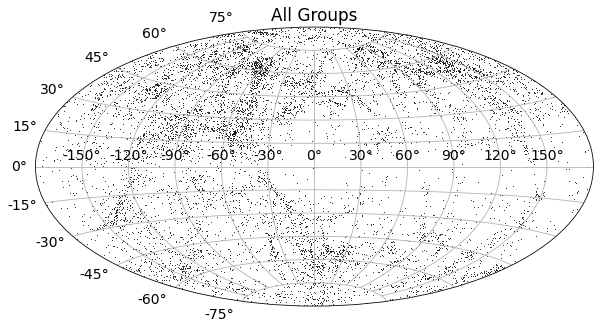

In [7]:
import astropy.units as u
import astropy.coordinates as coord
import astropy.units as u
from astropy.io import ascii
from astropy.coordinates import SkyCoord


from astropy.coordinates import ICRS, Galactic, FK4, FK5  # Low-level frames
from astropy.coordinates import Angle, Latitude, Longitude  # Angles


plt.rcParams["figure.figsize"] = (10,6) #increase size of figure

eq = SkyCoord(l=groups['GLON'], b=groups['GLAT'], frame='galactic', unit=u.deg)
gal = eq.galactic

gal = SkyCoord(l=groups['GLON'], b=groups['GLAT'], frame = 'galactic', unit=u.deg)


plt.subplot(111, projection='aitoff')
plt.grid(True)
plt.scatter(gal.l.wrap_at('180d').radian,
            gal.b.radian, marker='o', c='k', s=1, lw=0); #added same marker appearance as above code
plt.title('All Groups')


#plt.savefig('all_groups_gal_plt.png')

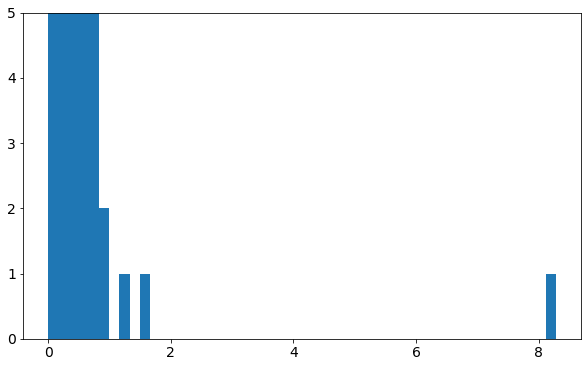

In [8]:
plt.rcParams["figure.figsize"] = (10,6) #increase size of figure

x = groups['Rg']
plt.hist(x, 50)
plt.ylim(0,5)

plt.show()

## Removing groups with blank distance values

In [9]:
mask = groups['D'].mask == False   #removing objects dont have a D value
groups = groups[mask]

groups[:10]
#len(groups)

PGC1,PGC1+,Mem,GLON,GLAT,SGL,SGB,Ksmag,logK,Vh,VLS,ND,D,errD,sigmaL,sigmaV,R2t,Rg,logMk,logMd,ID
int32,int32,int32,float64,float64,float64,float64,float64,float64,int32,int32,int32,float64,int32,int32,int32,float64,float64,float64,float64,int32
43296,43296,191,302.2241,21.6465,156.3251,-11.5819,4.61,12.71,3407,3142,59,36.96,3,595,800,1.612,0.893,14.624,14.717,0
46618,43296,30,307.8738,19.2865,159.6426,-6.8008,6.07,12.11,3340,3086,5,37.57,7,350,307,0.95,0.745,13.936,13.808,1
45174,43296,34,306.0424,32.5707,146.1941,-6.0422,6.42,11.96,3292,3059,4,44.03,8,307,300,0.833,0.693,13.764,13.756,2
40498,43296,24,297.5648,23.0823,153.9019,-15.4648,6.48,11.92,3258,2986,4,28.45,6,296,170,0.801,0.607,13.713,13.207,3
43557,43296,22,302.9333,36.4075,141.8602,-7.7062,6.82,11.81,3296,3066,7,39.89,8,267,163,0.724,0.428,13.582,13.017,4
46409,43296,12,307.9495,14.9305,163.9909,-7.402,6.96,11.7,3148,2889,4,33.18,8,243,174,0.659,0.399,13.459,13.045,5
45466,43296,22,307.803,38.9261,140.2186,-3.4022,7.42,11.48,2995,2783,2,38.06,12,201,118,0.544,0.444,13.21,12.747,6
49424,43296,7,313.8107,13.0725,166.6082,-2.0176,7.43,11.41,2833,2591,1,33.88,18,189,130,0.513,0.391,13.134,12.782,7
49106,43296,8,312.8342,12.8475,166.7144,-2.9897,7.65,11.4,3066,2820,1,30.06,18,187,97,0.507,0.204,13.117,12.243,8


## Galatic Plot of All Groups w/ 'D' value listed

Text(0.5, 1.0, 'Groups w/ "D"')

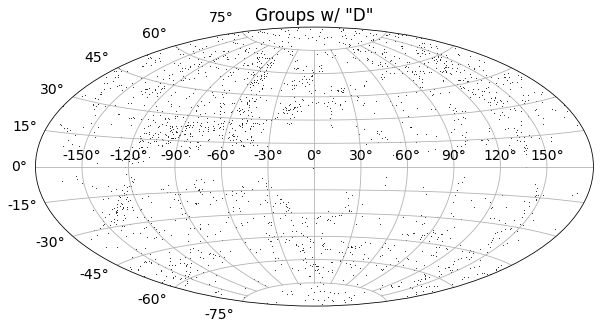

In [10]:
import astropy.units as u
import astropy.coordinates as coord
import astropy.units as u
from astropy.io import ascii
from astropy.coordinates import SkyCoord

plt.rcParams["figure.figsize"] = (10,6) #increase size of figure

eq = SkyCoord(l=groups['GLON'], b=groups['GLAT'], frame='galactic', unit=u.deg)
gal = eq.galactic

gal = SkyCoord(l=groups['GLON'], b=groups['GLAT'], frame='galactic', unit=u.deg)


plt.subplot(111, projection='aitoff')
plt.grid(True)
plt.scatter(gal.l.wrap_at('180d').radian,
            gal.b.radian, marker='o', c='k', s=1, lw=0); #added same marker appearance as above code

plt.title('Groups w/ "D"')

#plt.savefig('groups_D_gal_plt.png')

## 3D Distance Method

(Don't need to do the 2D method with 300 km/s relative velocity cutoff for the groups)

In [11]:
# Code I was testing to try to do a membership cut (Not needed for this research?)

'''

for i in range(10): #len(dwarf_table)):
    
    #distances to systems
    dwarf_r = const.c.to('km/s')*dwarf_table['Z'][i]/H0 
    
    group_r = groups['D']*u.Mpc

    
    #galaxy positions to calcuate their separation
    dwarf_pos = SkyCoord(ra=dwarf_table['RA'][i]*u.degree, dec=dwarf_table['DEC'][i]*u.degree, distance=dwarf_r)
    group_pos = SkyCoord(ra=groups['GLON']*u.degree, 
                            dec=groups['GLAT']*u.degree, distance=group_r)
    group_sep_dist=group_pos.separation_3d(dwarf_pos)
    
    #Adding group membership conditions
    
    #calcuate velocity of dwarf galaxy and group
    v_dwarf = const.c.to('km/s')*dwarf_table['Z'][i]
    v_group = groups['Vh']*u.km/u.s
    
    group_sigmaV = groups['sigmaV']*u.km/u.s
    group_radius = groups['R2t']*u.Mpc
    
    
    di = ~((abs(v_dwarf - v_group) <= 3*group_sigmaV) & (group_sep_dist <= 1.5*group_radius))
    groups[di] = False
    #di = ~(group_sep_dist <= 1.5*group_radius)
    #groups[di] = False
    
    #galaxy positions to calcuate their separation excluding group membership 
    dwarf_pos = SkyCoord(ra=dwarf_table['RA'][i]*u.degree, dec=dwarf_table['DEC'][i]*u.degree, distance=dwarf_r)
    group_pos = SkyCoord(ra=groups['GLON'][di]*u.degree, 
                            dec=groups['GLAT'][di]*u.degree, distance=group_r)
    group_sep_dist2=group_pos.separation_3d(dwarf_pos)
    
    
    nearby_neigh_index = np.argmin(group_sep_dist2) #finding the nearest neighbor
    
    
    
    dwarf_table['3D_group_dist'][i] = group_sep_dist2[nearby_neigh_index].value #unit Mpc
     
    neighbor_id = groups['ID'][di] 
    dwarf_table['3D_group_ID'][i] = neighbor_id[nearby_neigh_index] #ID# of the closest neighbor galaxy
    
    
    #testing
    if (abs(v_dwarf - v_group) <= 3*group_sigmaV) & (group_sep_dist <= 1.5*group_radius):
    
        nearby_neigh_index = np.argmin(group_sep_dist) #finding the nearest neighbor
        dwarf_table['3D_group_dist'][i] = group_sep_dist[nearby_neigh_index].value #unit Mpc
        neighbor_id = groups['ID'] 
        dwarf_table['3D_group_ID'][i] = neighbor_id[nearby_neigh_index] #ID# of the closest neighbor galaxy

    # Doing calculation with virial radius normalization
''';
    

In [12]:
'''

from astropy import constants as const
from astropy import units as u
from astropy.coordinates import SkyCoord


dwarf_table['member'] = np.nan

for i in range(10): #len(dwarf_table)):
    
    
    #Adding group membership conditions
    
    #calcuate velocity of dwarf galaxy and group
    v_dwarf = const.c.to('km/s')*dwarf_table['Z'][i]
    v_group = groups['Vh']*u.km/u.s
    
    group_sigmaV = groups['sigmaV']*u.km/u.s
    group_radius = groups['R2t']*u.Mpc
    
    #if (group_sep_dist <= 1.5*group_radius).any():
        #dwarf_table['member']= Y
        
    
    di = ~((abs(v_dwarf - v_group) <= 3*group_sigmaV) & (group_sep_dist <= 1.5*group_radius))
     
    groups[di] = False
    
    #galaxy positions to calcuate their separation excluding group membership 
    dwarf_pos = SkyCoord(ra=dwarf_table['RA'][i]*u.degree, dec=dwarf_table['DEC'][i]*u.degree, distance=dwarf_r)
    group_pos = SkyCoord(ra=groups['GLON'][di]*u.degree, 
                            dec=groups['GLAT'][di]*u.degree, distance=group_r)
    group_sep_dist2=group_pos.separation_3d(dwarf_pos)
    
    
    nearby_neigh_index = np.argmin(group_sep_dist2) #finding the nearest neighbor
    
    
    dwarf_table['3D_group_dist'][i] = group_sep_dist2[nearby_neigh_index].value #unit Mpc
     
    neighbor_id = groups['ID'][di] 
    dwarf_table['3D_group_ID'][i] = neighbor_id[nearby_neigh_index] #ID# of the closest neighbor galaxy
    
    
    #testing
    if (abs(v_dwarf - v_group) <= 3*group_sigmaV) & (group_sep_dist <= 1.5*group_radius):
    
        nearby_neigh_index = np.argmin(group_sep_dist) #finding the nearest neighbor
        dwarf_table['3D_group_dist'][i] = group_sep_dist[nearby_neigh_index].value #unit Mpc
        neighbor_id = groups['ID'] 
        dwarf_table['3D_group_ID'][i] = neighbor_id[nearby_neigh_index] #ID# of the closest neighbor galaxy

''';
   

## Removing H0 = 75 dependance from Group Table (D_h)

In [13]:
#making D in terms of h
H0_group = 75*u.km/u.s/u.Mpc
h=1
H0 = 100*h*u.km/u.s/u.Mpc #Hubble's Constant

groups['D_h'] = np.nan

for i in range(len(groups)):
    groups['D_h'][i] = groups['D'][i]*H0_group/(h*H0)

## New Table group_Rg 

Only includes groups that have both D values and Rg (virial radius) values

In [14]:
mask = groups['Rg'].mask == False   #removing objects dont have a virial radius value
groups_Rg = groups[mask]

In [15]:
groups_Rg[:5]


PGC1,PGC1+,Mem,GLON,GLAT,SGL,SGB,Ksmag,logK,Vh,VLS,ND,D,errD,sigmaL,sigmaV,R2t,Rg,logMk,logMd,ID,D_h
int32,int32,int32,float64,float64,float64,float64,float64,float64,int32,int32,int32,float64,int32,int32,int32,float64,float64,float64,float64,int32,float64
43296,43296,191,302.2241,21.6465,156.3251,-11.5819,4.61,12.71,3407,3142,59,36.96,3,595,800,1.612,0.893,14.624,14.717,0,27.72
46618,43296,30,307.8738,19.2865,159.6426,-6.8008,6.07,12.11,3340,3086,5,37.57,7,350,307,0.95,0.745,13.936,13.808,1,28.1775
45174,43296,34,306.0424,32.5707,146.1941,-6.0422,6.42,11.96,3292,3059,4,44.03,8,307,300,0.833,0.693,13.764,13.756,2,33.0225
40498,43296,24,297.5648,23.0823,153.9019,-15.4648,6.48,11.92,3258,2986,4,28.45,6,296,170,0.801,0.607,13.713,13.207,3,21.3375
43557,43296,22,302.9333,36.4075,141.8602,-7.7062,6.82,11.81,3296,3066,7,39.89,8,267,163,0.724,0.428,13.582,13.017,4,29.9175


## Galatic Plot of All Groups w/ 'D' and 'Rg' values listed

Text(0.5, 1.0, 'Groups w/ "D","Rg"')

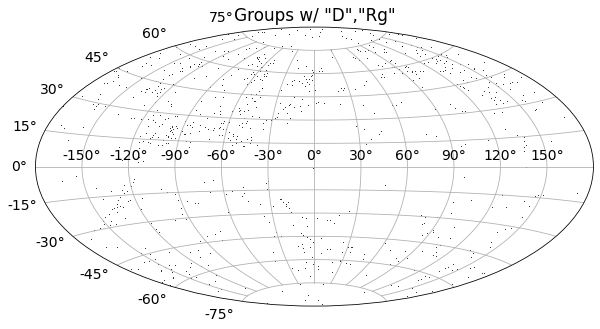

In [16]:
plt.rcParams["figure.figsize"] = (10,6) #increase size of figure

eq = SkyCoord(l=groups_Rg['GLON'], b=groups_Rg['GLAT'], frame='galactic', unit=u.deg)
gal = eq.galactic

gal = SkyCoord(l=groups_Rg['GLON'], b=groups_Rg['GLAT'], frame='galactic', unit=u.deg)


plt.subplot(111, projection='aitoff')
plt.grid(True)
plt.scatter(gal.l.wrap_at('180d').radian,
            gal.b.radian, marker='o', c='k', s=1, lw=0); #added same marker appearance as above code
plt.title('Groups w/ "D","Rg"')

#plt.savefig('groups_D_Rg_gal_plt.png')

### Histogram of Rg values

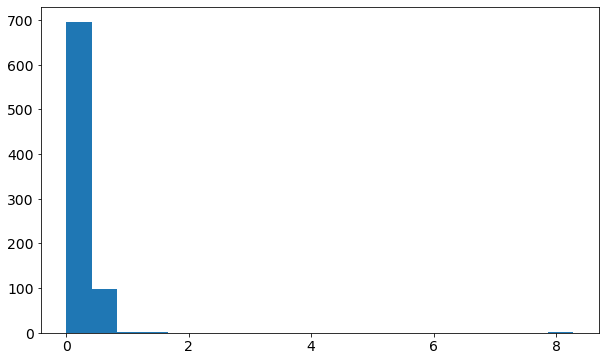

<Figure size 720x432 with 0 Axes>

In [17]:
plt.rcParams["figure.figsize"] = (10,6) #increase size of figure

x = groups_Rg['Rg']
plt.hist(x, 20)

plt.show()

plt.savefig('Rg_hist.png')

## Finding Distances to nearest group w/ H0 = 100h

### 3D distance method H0 = 100h

In [18]:
#attempting to use D_h as distance instead

from astropy import constants as const
from astropy import units as u
from astropy.coordinates import SkyCoord


#creating the new columns
dwarf_table['3D_group_ID_h'] = -1
dwarf_table['3D_group_dist_h'] = np.nan


#dwarf_table['member'] = np.nan

h=1
H0 = 100*h*u.km/u.s/u.Mpc #Hubble's Constant
#H0 = 75*u.km/u.s/u.Mpc


for i in range(len(dwarf_table)):
    
    #distances to systems
    dwarf_r = const.c.to('km/s')*dwarf_table['Z'][i]/H0 
    group_r = groups['D_h']*u.Mpc

    
    #galaxy positions to calcuate their separation
    dwarf_pos = SkyCoord(ra=dwarf_table['RA'][i]*u.degree, dec=dwarf_table['DEC'][i]*u.degree, distance=dwarf_r)
    group_pos = SkyCoord(l=groups['GLON']*u.degree, 
                            b=groups['GLAT']*u.degree, frame='galactic', distance=group_r)
    group_sep_dist=group_pos.separation_3d(dwarf_pos)
    

    nearby_neigh_index = np.argmin(group_sep_dist) #finding the nearest neighbor
    dwarf_table['3D_group_dist_h'][i] = group_sep_dist[nearby_neigh_index].value #unit Mpc
    neighbor_id = groups['ID'] 
    dwarf_table['3D_group_ID_h'][i] = neighbor_id[nearby_neigh_index] #ID# of the closest neighbor galaxy
    

In [19]:
dwarf_table

aimc,IN_DR7_LSS,RA,DEC,Z,ELPETRO_ABSMAG_r,u_r,sSFR,HImass,flag3727,t3,Z12logOH,Zerr,logNO,NOerr,vflag_VF,ID,2D_neighbor_ID,2D_neighbor_dist,2D_neighbor_ID_vir,2D_neighbor_dist_vir,3D_neighbor_ID,3D_neighbor_dist,3D_neighbor_ID_vir,3D_neighbor_dist_vir,3D_group_ID_h,3D_group_dist_h
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,int32,int32,float64,int32,float64,int32,float64,int32,float64,int32,float64
0.0,1.0,147.17645340393182,-0.3540349522432606,0.006282840855419636,-15.534673690795898,1.5979467332363129,-9.897252082824707,nan,nan,nan,nan,nan,nan,nan,2,12,49,0.18150554228021565,585714,1.3634632510011546,573,0.3210655024172438,208,2.3657856725525463,1836,1.0742224173858135
106.68,1.0,146.85676432411947,-0.27409664376066756,0.02196459472179413,-16.7003231048584,1.6220477223396301,-9.639364242553711,nan,nan,nan,nan,nan,nan,nan,2,31,79,0.6704515586457357,92,2.414294367856323,80,0.9556330809587631,585700,3.7385754919749274,5779,16.158222910173883
0.0,1.0,146.19277353258968,-0.6882589506846374,0.004080323036760092,-15.290872573852539,1.220979243516922,-9.548693656921387,nan,nan,nan,nan,nan,nan,nan,2,44,585695,0.035663331434249095,639857,0.46035331496314846,585695,0.221530846641702,585695,2.8927174640703734,1827,3.3139826319523493
199.39,1.0,146.00780426178756,-0.6422574964819474,0.004776299931108952,-15.831652641296387,0.7728094607591629,-7.982375621795654,nan,0.0,1.5717060395681055,7.73051787768279,0.0179600111522654,-0.5320566539047968,0.44255404846002694,2,45,585695,0.006393284307917346,585695,0.08348257342324528,639857,0.6010801341408164,639857,7.109919536505821,1827,1.421699497251664
0.0,1.0,146.6190367018052,-0.43434631860351913,0.006036635022610426,-16.34455108642578,1.7559601366519928,-9.769034385681152,nan,nan,nan,nan,nan,nan,nan,2,49,585714,0.07059729101415332,585714,0.4172620229334301,585714,0.3596492056527832,585714,2.125689993784549,1836,0.5424000394747401
21.37,1.0,146.28299647851426,0.0641463074401177,0.021579895168542862,-16.594152450561523,2.861306369304657,-10.189197540283203,nan,nan,nan,nan,nan,nan,nan,2,91,80,0.038323438909891316,92,0.17226127693210824,92,0.10268810550034341,92,0.3052372880294029,5779,14.83905246742299
0.0,1.0,145.3209420527222,0.771115298508063,0.00658948952332139,-14.810564994812012,1.925416886806488,-9.748167991638184,nan,0.0,3.57494352664153,7.007952737418975,0.2935407103312847,-0.9956427104372425,0.4090425521885854,2,186,208,0.16133006586884238,208,0.576340261650062,208,0.6516081633066332,208,2.3278241244801396,3162,1.0491031875776191
-99.0,1.0,145.4212238164792,0.5359777701124617,0.1459859162569046,-14.866592407226562,-3.4473413228988647,nan,nan,nan,nan,nan,nan,nan,nan,9,209,206,0.23624643923335842,206,0.5428900018158784,206,0.53709656480362,206,1.2342380947105809,5142,374.2001414058293
0.0,1.0,146.26576246056774,1.2304320197663696,0.006355164106935263,-14.2352876663208,1.6930833458900452,-9.700735092163086,nan,0.0,4.040375795270858,7.048466376827344,0.3785143362106475,-1.2323400004904403,0.5170923842950506,2,238,55137,0.13915957213413985,55243,0.8924983833408165,55137,0.18685834815465546,208,1.4133282793228592,3162,1.4158243111033433


### 3D Vir Distance w/ H0 = 100h

In [20]:
#virial normalization but with H0 = 100h

#columns for virial radius normalization 
dwarf_table['3D_group_ID_vir_h'] = -1
dwarf_table['3D_group_dist_vir_h'] = np.nan


h=1
H0 = 100*h*u.km/u.s/u.Mpc #Hubble's Constant
#H0 = 75*u.km/u.s/u.Mpc


for i in range(len(dwarf_table)):
    
    #distances to systems
    dwarf_r = const.c.to('km/s')*dwarf_table['Z'][i]/H0 
    group_r = groups_Rg['D_h']*u.Mpc

    
    #galaxy positions to calcuate their separation
    dwarf_pos = SkyCoord(ra=dwarf_table['RA'][i]*u.degree, dec=dwarf_table['DEC'][i]*u.degree, distance=dwarf_r)
    group_pos = SkyCoord(l=groups_Rg['GLON']*u.degree, 
                            b=groups_Rg['GLAT']*u.degree,frame='galactic', distance=group_r)
    group_sep_dist=group_pos.separation_3d(dwarf_pos)
    

    
    r_vir = groups_Rg['Rg'] # calculating virial radius of all neighboring galaxies
    
    
    group_sep_dist_vir = group_sep_dist / r_vir # normalizing distance
    

    
    nearby_neigh_index_vir = np.nanargmin(group_sep_dist_vir) #finding closest neighbor with normalized virial distance
    
    dwarf_table['3D_group_dist_vir_h'][i] = group_sep_dist_vir[nearby_neigh_index_vir].value #unit , adding to dwarf table
    
    
    neighbor_id = groups_Rg['ID']
    dwarf_table['3D_group_ID_vir_h'][i] = neighbor_id[nearby_neigh_index_vir] #adding neighbor galaxy's ID to dwarf table
    

## Removing the group with Rg = 8.279 Mpc

In [58]:
mask = groups_Rg['Rg']<8     #removing objects that are not galaxies
groups_Rg_2 = groups_Rg[mask]

In [61]:
#virial normalization but with H0 = 100h

#columns for virial radius normalization 
dwarf_table['3D_group_ID_vir_h_2'] = -1
dwarf_table['3D_group_dist_vir_h_2'] = np.nan


h=1
H0 = 100*h*u.km/u.s/u.Mpc #Hubble's Constant
#H0 = 75*u.km/u.s/u.Mpc


for i in range(len(dwarf_table)):
    
    #distances to systems
    dwarf_r = const.c.to('km/s')*dwarf_table['Z'][i]/H0 
    group_r = groups_Rg_2['D_h']*u.Mpc

    
    #galaxy positions to calcuate their separation
    dwarf_pos = SkyCoord(ra=dwarf_table['RA'][i]*u.degree, dec=dwarf_table['DEC'][i]*u.degree, distance=dwarf_r)
    group_pos = SkyCoord(l=groups_Rg_2['GLON']*u.degree, 
                            b=groups_Rg_2['GLAT']*u.degree,frame='galactic', distance=group_r)
    group_sep_dist=group_pos.separation_3d(dwarf_pos)
    

    
    r_vir = groups_Rg_2['Rg'] # calculating virial radius of all neighboring galaxies
    
    
    group_sep_dist_vir = group_sep_dist / r_vir # normalizing distance
    

    
    nearby_neigh_index_vir = np.nanargmin(group_sep_dist_vir) #finding closest neighbor with normalized virial distance
    
    dwarf_table['3D_group_dist_vir_h_2'][i] = group_sep_dist_vir[nearby_neigh_index_vir].value #unit , adding to dwarf table
    
    
    neighbor_id = groups_Rg_2['ID']
    dwarf_table['3D_group_ID_vir_h_2'][i] = neighbor_id[nearby_neigh_index_vir] #adding neighbor galaxy's ID to dwarf table

In [62]:
dwarf_table


aimc,IN_DR7_LSS,RA,DEC,Z,ELPETRO_ABSMAG_r,u_r,sSFR,HImass,flag3727,t3,Z12logOH,Zerr,logNO,NOerr,vflag_VF,ID,2D_neighbor_ID,2D_neighbor_dist,2D_neighbor_ID_vir,2D_neighbor_dist_vir,3D_neighbor_ID,3D_neighbor_dist,3D_neighbor_ID_vir,3D_neighbor_dist_vir,3D_group_ID_h,3D_group_dist_h,3D_group_ID_vir_h,3D_group_dist_vir_h,3D_group_ID,3D_group_dist,3D_group_ID_vir,3D_group_dist_vir,3D_group_ID_vir_h_2,3D_group_dist_vir_h_2
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,int32,int32,float64,int32,float64,int32,float64,int32,float64,int32,float64,int32,float64,int32,float64,int32,float64,int32,float64
0.0,1.0,147.17645340393182,-0.3540349522432606,0.006282840855419636,-15.534673690795898,1.5979467332363129,-9.897252082824707,nan,nan,nan,nan,nan,nan,nan,2,12,49,0.18150554228021565,585714,1.3634632510011546,573,0.3210655024172438,208,2.3657856725525463,1836,1.0742224173858135,2692,2.6108568768550136,1836,1.4322965565144177,2692,3.4811425024733507,1822,4.157435505537396
106.68,1.0,146.85676432411947,-0.27409664376066756,0.02196459472179413,-16.7003231048584,1.6220477223396301,-9.639364242553711,nan,nan,nan,nan,nan,nan,nan,2,31,79,0.6704515586457357,92,2.414294367856323,80,0.9556330809587631,585700,3.7385754919749274,5779,16.158222910173883,2692,8.209247635169563,5779,21.544297213565166,2692,10.945663513559415,1905,42.04075514809901
0.0,1.0,146.19277353258968,-0.6882589506846374,0.004080323036760092,-15.290872573852539,1.220979243516922,-9.548693656921387,nan,nan,nan,nan,nan,nan,nan,2,44,585695,0.035663331434249095,639857,0.46035331496314846,585695,0.221530846641702,585695,2.8927174640703734,1827,3.3139826319523493,2692,1.8550108979851636,1827,4.418643509269802,2692,2.473347863980218,210,6.934700831329314
199.39,1.0,146.00780426178756,-0.6422574964819474,0.004776299931108952,-15.831652641296387,0.7728094607591629,-7.982375621795654,nan,0.0,1.5717060395681055,7.73051787768279,0.0179600111522654,-0.5320566539047968,0.44255404846002694,2,45,585695,0.006393284307917346,585695,0.08348257342324528,639857,0.6010801341408164,639857,7.109919536505821,1827,1.421699497251664,2692,2.085800721398072,1827,1.895599329668887,2692,2.7810676285307623,1822,3.9055737248704028
0.0,1.0,146.6190367018052,-0.43434631860351913,0.006036635022610426,-16.34455108642578,1.7559601366519928,-9.769034385681152,nan,nan,nan,nan,nan,nan,nan,2,49,585714,0.07059729101415332,585714,0.4172620229334301,585714,0.3596492056527832,585714,2.125689993784549,1836,0.5424000394747401,2692,2.520965893932336,1836,0.7232000526329905,2692,3.361287858576448,1822,3.0271919343968836
21.37,1.0,146.28299647851426,0.0641463074401177,0.021579895168542862,-16.594152450561523,2.861306369304657,-10.189197540283203,nan,nan,nan,nan,nan,nan,nan,2,91,80,0.038323438909891316,92,0.17226127693210824,92,0.10268810550034341,92,0.3052372880294029,5779,14.83905246742299,2692,8.062069755098275,5779,19.785403289897335,2692,10.749426340131036,1905,39.526879438020686
0.0,1.0,145.3209420527222,0.771115298508063,0.00658948952332139,-14.810564994812012,1.925416886806488,-9.748167991638184,nan,0.0,3.57494352664153,7.007952737418975,0.2935407103312847,-0.9956427104372425,0.4090425521885854,2,186,208,0.16133006586884238,208,0.576340261650062,208,0.6516081633066332,208,2.3278241244801396,3162,1.0491031875776191,2692,2.692161251114876,3162,1.398804250103492,2692,3.5895483348198347,3162,5.407748389575356
-99.0,1.0,145.4212238164792,0.5359777701124617,0.1459859162569046,-14.866592407226562,-3.4473413228988647,nan,nan,nan,nan,nan,nan,nan,nan,9,209,206,0.23624643923335842,206,0.5428900018158784,206,0.53709656480362,206,1.2342380947105809,5142,374.2001414058293,2692,53.06795555138572,5142,498.9335218744392,2692,70.75727406851432,3073,283.45735734200235
0.0,1.0,146.26576246056774,1.2304320197663696,0.006355164106935263,-14.2352876663208,1.6930833458900452,-9.700735092163086,nan,0.0,4.040375795270858,7.048466376827344,0.3785143362106475,-1.23234000049

## Finding Distances to nearest group w/ H0 = 75 km/s/Mpc

### 3D distance method H0 = 75

In [21]:
from astropy import constants as const
from astropy import units as u
from astropy.coordinates import SkyCoord


#creating the new columns
dwarf_table['3D_group_ID'] = -1
dwarf_table['3D_group_dist'] = np.nan


#h=1
#H0 = 100*h*u.km/u.s/u.Mpc #Hubble's Constant
H0 = 75*u.km/u.s/u.Mpc


for i in range(len(dwarf_table)):
    
    #distances to systems
    dwarf_r = const.c.to('km/s')*dwarf_table['Z'][i]/H0 
    group_r = groups['D']*u.Mpc

    
    #galaxy positions to calcuate their separation
    dwarf_pos = SkyCoord(ra=dwarf_table['RA'][i]*u.degree, dec=dwarf_table['DEC'][i]*u.degree, distance=dwarf_r)
    group_pos = SkyCoord(l=groups['GLON']*u.degree, 
                            b=groups['GLAT']*u.degree, frame='galactic', distance=group_r)
    group_sep_dist=group_pos.separation_3d(dwarf_pos)
    

    nearby_neigh_index = np.argmin(group_sep_dist) #finding the nearest neighbor
    dwarf_table['3D_group_dist'][i] = group_sep_dist[nearby_neigh_index].value #unit Mpc
    neighbor_id = groups['ID'] 
    dwarf_table['3D_group_ID'][i] = neighbor_id[nearby_neigh_index] #ID# of the closest neighbor galaxy
    
    
    # Had to separate virial calculation into different cell b/c not all the groups with D values also had Rg values
    '''
    # Doing calculation with virial radius normalization
    
    r_vir = groups_Rg['Rg'] # calculating virial radius of all neighboring galaxies
    
    group_sep_dist_vir = group_sep_dist / r_vir # normalizing distance
    
    nearby_neigh_index_vir = np.nanargmin(group_sep_dist_vir) #finding closest neighbor with normalized virial distance
    
    dwarf_table['3D_group_dist_vir'][i] = group_sep_dist_vir[nearby_neigh_index_vir].value #unit , adding to dwarf table
    
    
    neighbor_id = groups['ID']
    dwarf_table['3D_group_ID_vir'][i] = neighbor_id[nearby_neigh_index_vir] #adding neighbor galaxy's ID to dwarf table
    
    '''

In [22]:
dwarf_table[:10]

aimc,IN_DR7_LSS,RA,DEC,Z,ELPETRO_ABSMAG_r,u_r,sSFR,HImass,flag3727,t3,Z12logOH,Zerr,logNO,NOerr,vflag_VF,ID,2D_neighbor_ID,2D_neighbor_dist,2D_neighbor_ID_vir,2D_neighbor_dist_vir,3D_neighbor_ID,3D_neighbor_dist,3D_neighbor_ID_vir,3D_neighbor_dist_vir,3D_group_ID_h,3D_group_dist_h,3D_group_ID_vir_h,3D_group_dist_vir_h,3D_group_ID,3D_group_dist
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,int32,int32,float64,int32,float64,int32,float64,int32,float64,int32,float64,int32,float64,int32,float64
0.0,1.0,147.17645340393182,-0.3540349522432606,0.006282840855419636,-15.534673690795898,1.5979467332363129,-9.897252082824707,nan,nan,nan,nan,nan,nan,nan,2,12,49,0.18150554228021565,585714,1.3634632510011546,573,0.3210655024172438,208,2.3657856725525463,1836,1.0742224173858135,2692,2.6108568768550136,1836,1.4322965565144177
106.68,1.0,146.85676432411947,-0.27409664376066756,0.02196459472179413,-16.7003231048584,1.6220477223396301,-9.639364242553711,nan,nan,nan,nan,nan,nan,nan,2,31,79,0.6704515586457357,92,2.414294367856323,80,0.9556330809587631,585700,3.7385754919749274,5779,16.158222910173883,2692,8.209247635169563,5779,21.544297213565166
0.0,1.0,146.19277353258968,-0.6882589506846374,0.004080323036760092,-15.290872573852539,1.220979243516922,-9.548693656921387,nan,nan,nan,nan,nan,nan,nan,2,44,585695,0.035663331434249095,639857,0.46035331496314846,585695,0.221530846641702,585695,2.8927174640703734,1827,3.3139826319523493,2692,1.8550108979851636,1827,4.418643509269802
199.39,1.0,146.00780426178756,-0.6422574964819474,0.004776299931108952,-15.831652641296387,0.7728094607591629,-7.982375621795654,nan,0.0,1.5717060395681055,7.73051787768279,0.0179600111522654,-0.5320566539047968,0.44255404846002694,2,45,585695,0.006393284307917346,585695,0.08348257342324528,639857,0.6010801341408164,639857,7.109919536505821,1827,1.421699497251664,2692,2.085800721398072,1827,1.895599329668887
0.0,1.0,146.6190367018052,-0.43434631860351913,0.006036635022610426,-16.34455108642578,1.7559601366519928,-9.769034385681152,nan,nan,nan,nan,nan,nan,nan,2,49,585714,0.07059729101415332,585714,0.4172620229334301,585714,0.3596492056527832,585714,2.125689993784549,1836,0.5424000394747401,2692,2.520965893932336,1836,0.7232000526329905
21.37,1.0,146.28299647851426,0.0641463074401177,0.021579895168542862,-16.594152450561523,2.861306369304657,-10.189197540283203,nan,nan,nan,nan,nan,nan,nan,2,91,80,0.038323438909891316,92,0.17226127693210824,92,0.10268810550034341,92,0.3052372880294029,5779,14.83905246742299,2692,8.062069755098275,5779,19.785403289897335
0.0,1.0,145.3209420527222,0.771115298508063,0.00658948952332139,-14.810564994812012,1.925416886806488,-9.748167991638184,nan,0.0,3.57494352664153,7.007952737418975,0.2935407103312847,-0.9956427104372425,0.4090425521885854,2,186,208,0.16133006586884238,208,0.576340261650062,208,0.6516081633066332,208,2.3278241244801396,3162,1.0491031875776191,2692,2.692161251114876,3162,1.398804250103492
-99.0,1.0,145.4212238164792,0.5359777701124617,0.1459859162569046,-14.866592407226562,-3.4473413228988647,nan,nan,nan,nan,nan,nan,nan,nan,9,209,206,0.23624643923335842,206,0.5428900018158784,206,0.53709656480362,206,1.2342380947105809,5142,374.2001414058293,2692,53.06795555138572,5142,498.9335218744392
0.0,1.0,146.26576246056774,1.2304320197663696,0.006355164106935263,-14.2352876663208,1.6930833458900452,-9.700735092163086,nan,0.0,4.040375795270858,7.048466376827344,0.3785143362106475,-1.2323400004904403,0.5170923842950506,2,238,55137,0.13915957213413985,55243,0.8924983833408165,55137,0.18685834815465546,208,1.4133282793228592,3162,1.4158243111033433,2692,2.616746572174997,3162,1.8877657481377905


### 3D Vir Distance w/ H0 = 75

In [23]:
#columns for virial radius normalization 
dwarf_table['3D_group_ID_vir'] = -1
dwarf_table['3D_group_dist_vir'] = np.nan


#dwarf_table['member'] = np.nan

#h=1
#H0 = 100*h*u.km/u.s/u.Mpc #Hubble's Constant
H0 = 75*u.km/u.s/u.Mpc


for i in range(len(dwarf_table)):
    
    #distances to systems
    dwarf_r = const.c.to('km/s')*dwarf_table['Z'][i]/H0 
    group_r = groups_Rg['D']*u.Mpc

    
    #galaxy positions to calcuate their separation
    dwarf_pos = SkyCoord(ra=dwarf_table['RA'][i]*u.degree, dec=dwarf_table['DEC'][i]*u.degree, distance=dwarf_r)
    group_pos = SkyCoord(l=groups_Rg['GLON']*u.degree, 
                            b=groups_Rg['GLAT']*u.degree, frame='galactic', distance=group_r)
    group_sep_dist=group_pos.separation_3d(dwarf_pos)
    
    
    
    # Doing calculation with virial radius normalization
    
    r_vir = groups_Rg['Rg'] # calculating virial radius of all neighboring galaxies
    
    
    group_sep_dist_vir = group_sep_dist / r_vir # normalizing distance
    

    
    nearby_neigh_index_vir = np.nanargmin(group_sep_dist_vir) #finding closest neighbor with normalized virial distance
    
    dwarf_table['3D_group_dist_vir'][i] = group_sep_dist_vir[nearby_neigh_index_vir].value #unit , adding to dwarf table
    
    
    neighbor_id = groups_Rg['ID']
    dwarf_table['3D_group_ID_vir'][i] = neighbor_id[nearby_neigh_index_vir] #adding neighbor galaxy's ID to dwarf table
    
    

In [24]:
#groups[17]

In [25]:
groups[647] #The group that shows up for all closest virial calcualtions

PGC1,PGC1+,Mem,GLON,GLAT,SGL,SGB,Ksmag,logK,Vh,VLS,ND,D,errD,sigmaL,sigmaV,R2t,Rg,logMk,logMd,ID,D_h
int32,int32,int32,float64,float64,float64,float64,float64,float64,int32,int32,int32,float64,int32,int32,int32,float64,float64,float64,float64,int32,float64
9332,10123,4,145.1531,-24.8122,335.8323,-9.6931,8.55,9.86,534,722,1,8.67,6,55,17,0.15,8.279,11.529,12.34,2692,6.5025


In [26]:
groups_Rg[120:140]

PGC1,PGC1+,Mem,GLON,GLAT,SGL,SGB,Ksmag,logK,Vh,VLS,ND,D,errD,sigmaL,sigmaV,R2t,Rg,logMk,logMd,ID,D_h
int32,int32,int32,float64,float64,float64,float64,float64,float64,int32,int32,int32,float64,int32,int32,int32,float64,float64,float64,float64,int32,float64
39819,39659,2,285.4229,63.2715,112.6648,-7.9449,12.68,8.83,1630,1481,1,29.65,14,35,33,0.094,0.221,10.92,11.332,1092,22.2375
53932,53932,84,0.2755,49.12,124.3121,31.7413,5.43,11.9,1819,1797,10,26.74,4,290,320,0.785,0.596,13.688,13.747,1123,20.054999999999996
52665,53932,10,354.8707,52.9538,122.4074,26.8972,6.71,11.32,1699,1657,1,30.48,14,174,157,0.471,0.442,13.021,12.997,1124,22.86
51233,53932,12,349.0502,58.3138,118.7313,21.5833,6.69,11.25,1579,1527,5,23.63,7,164,163,0.444,0.299,12.945,12.86,1125,17.7225
52455,53932,18,351.7225,51.7533,124.5538,25.6993,7.11,11.19,1771,1720,4,25.8,9,155,99,0.42,0.32,12.873,12.459,1126,19.35
53499,53932,5,355.3297,48.4336,126.8219,29.209,7.78,10.98,1893,1852,1,25.82,14,129,39,0.35,0.268,12.635,11.563,1127,19.365
53630,53932,6,349.8172,43.3399,133.8366,27.6061,7.92,10.94,1937,1874,1,27.67,13,124,160,0.337,0.202,12.584,12.67,1128,20.7525
54097,53932,2,348.5217,39.1159,138.7223,27.9287,8.17,10.86,1991,1917,1,26.06,14,116,120,0.314,0.072,12.491,11.976,1130,19.545
51787,53932,15,351.7758,56.4588,119.8605,23.7074,7.97,10.79,1663,1618,3,26.88,9,109,139,0.296,0.264,12.417,12.67,1131,20.16


In [27]:
dwarf_table[:5]

aimc,IN_DR7_LSS,RA,DEC,Z,ELPETRO_ABSMAG_r,u_r,sSFR,HImass,flag3727,t3,Z12logOH,Zerr,logNO,NOerr,vflag_VF,ID,2D_neighbor_ID,2D_neighbor_dist,2D_neighbor_ID_vir,2D_neighbor_dist_vir,3D_neighbor_ID,3D_neighbor_dist,3D_neighbor_ID_vir,3D_neighbor_dist_vir,3D_group_ID_h,3D_group_dist_h,3D_group_ID_vir_h,3D_group_dist_vir_h,3D_group_ID,3D_group_dist,3D_group_ID_vir,3D_group_dist_vir
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,int32,int32,float64,int32,float64,int32,float64,int32,float64,int32,float64,int32,float64,int32,float64,int32,float64
0.0,1.0,147.17645340393182,-0.3540349522432606,0.006282840855419636,-15.534673690795898,1.5979467332363129,-9.897252082824707,nan,nan,nan,nan,nan,nan,nan,2,12,49,0.18150554228021565,585714,1.3634632510011546,573,0.3210655024172438,208,2.3657856725525463,1836,1.0742224173858135,2692,2.6108568768550136,1836,1.4322965565144177,2692,3.4811425024733507
106.68,1.0,146.85676432411947,-0.27409664376066756,0.02196459472179413,-16.7003231048584,1.6220477223396301,-9.639364242553711,nan,nan,nan,nan,nan,nan,nan,2,31,79,0.6704515586457357,92,2.414294367856323,80,0.9556330809587631,585700,3.7385754919749274,5779,16.158222910173883,2692,8.209247635169563,5779,21.544297213565166,2692,10.945663513559415
0.0,1.0,146.19277353258968,-0.6882589506846374,0.004080323036760092,-15.290872573852539,1.220979243516922,-9.548693656921387,nan,nan,nan,nan,nan,nan,nan,2,44,585695,0.035663331434249095,639857,0.46035331496314846,585695,0.221530846641702,585695,2.8927174640703734,1827,3.3139826319523493,2692,1.8550108979851636,1827,4.418643509269802,2692,2.473347863980218
199.39,1.0,146.00780426178756,-0.6422574964819474,0.004776299931108952,-15.831652641296387,0.7728094607591629,-7.982375621795654,nan,0.0,1.5717060395681055,7.73051787768279,0.0179600111522654,-0.5320566539047968,0.44255404846002694,2,45,585695,0.006393284307917346,585695,0.08348257342324528,639857,0.6010801341408164,639857,7.109919536505821,1827,1.421699497251664,2692,2.085800721398072,1827,1.895599329668887,2692,2.7810676285307623
0.0,1.0,146.6190367018052,-0.43434631860351913,0.006036635022610426,-16.34455108642578,1.7559601366519928,-9.769034385681152,nan,nan,nan,nan,nan,nan,nan,2,49,585714,0.07059729101415332,585714,0.4172620229334301,585714,0.3596492056527832,585714,2.125689993784549,1836,0.5424000394747401,2692,2.520965893932336,1836,0.7232000526329905,2692,3.361287858576448


### Attempt to find the relative velocity betweeen each dwarf galaxy and group

In [28]:
'''
dwarf_table['pec_v'] = np.nan

for i in range(10):
    
    v_dwarf = const.c.to('km/s')*dwarf_table['Z'][i]
    v_group = groups['Vh']*u.km/u.s
    dwarf_table['pec_v'][i] = abs(v_dwarf-v_group)
    
dwarf_table[:10]
''';

In [29]:
dwarf_table

aimc,IN_DR7_LSS,RA,DEC,Z,ELPETRO_ABSMAG_r,u_r,sSFR,HImass,flag3727,t3,Z12logOH,Zerr,logNO,NOerr,vflag_VF,ID,2D_neighbor_ID,2D_neighbor_dist,2D_neighbor_ID_vir,2D_neighbor_dist_vir,3D_neighbor_ID,3D_neighbor_dist,3D_neighbor_ID_vir,3D_neighbor_dist_vir,3D_group_ID_h,3D_group_dist_h,3D_group_ID_vir_h,3D_group_dist_vir_h,3D_group_ID,3D_group_dist,3D_group_ID_vir,3D_group_dist_vir
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,int32,int32,float64,int32,float64,int32,float64,int32,float64,int32,float64,int32,float64,int32,float64,int32,float64
0.0,1.0,147.17645340393182,-0.3540349522432606,0.006282840855419636,-15.534673690795898,1.5979467332363129,-9.897252082824707,nan,nan,nan,nan,nan,nan,nan,2,12,49,0.18150554228021565,585714,1.3634632510011546,573,0.3210655024172438,208,2.3657856725525463,1836,1.0742224173858135,2692,2.6108568768550136,1836,1.4322965565144177,2692,3.4811425024733507
106.68,1.0,146.85676432411947,-0.27409664376066756,0.02196459472179413,-16.7003231048584,1.6220477223396301,-9.639364242553711,nan,nan,nan,nan,nan,nan,nan,2,31,79,0.6704515586457357,92,2.414294367856323,80,0.9556330809587631,585700,3.7385754919749274,5779,16.158222910173883,2692,8.209247635169563,5779,21.544297213565166,2692,10.945663513559415
0.0,1.0,146.19277353258968,-0.6882589506846374,0.004080323036760092,-15.290872573852539,1.220979243516922,-9.548693656921387,nan,nan,nan,nan,nan,nan,nan,2,44,585695,0.035663331434249095,639857,0.46035331496314846,585695,0.221530846641702,585695,2.8927174640703734,1827,3.3139826319523493,2692,1.8550108979851636,1827,4.418643509269802,2692,2.473347863980218
199.39,1.0,146.00780426178756,-0.6422574964819474,0.004776299931108952,-15.831652641296387,0.7728094607591629,-7.982375621795654,nan,0.0,1.5717060395681055,7.73051787768279,0.0179600111522654,-0.5320566539047968,0.44255404846002694,2,45,585695,0.006393284307917346,585695,0.08348257342324528,639857,0.6010801341408164,639857,7.109919536505821,1827,1.421699497251664,2692,2.085800721398072,1827,1.895599329668887,2692,2.7810676285307623
0.0,1.0,146.6190367018052,-0.43434631860351913,0.006036635022610426,-16.34455108642578,1.7559601366519928,-9.769034385681152,nan,nan,nan,nan,nan,nan,nan,2,49,585714,0.07059729101415332,585714,0.4172620229334301,585714,0.3596492056527832,585714,2.125689993784549,1836,0.5424000394747401,2692,2.520965893932336,1836,0.7232000526329905,2692,3.361287858576448
21.37,1.0,146.28299647851426,0.0641463074401177,0.021579895168542862,-16.594152450561523,2.861306369304657,-10.189197540283203,nan,nan,nan,nan,nan,nan,nan,2,91,80,0.038323438909891316,92,0.17226127693210824,92,0.10268810550034341,92,0.3052372880294029,5779,14.83905246742299,2692,8.062069755098275,5779,19.785403289897335,2692,10.749426340131036
0.0,1.0,145.3209420527222,0.771115298508063,0.00658948952332139,-14.810564994812012,1.925416886806488,-9.748167991638184,nan,0.0,3.57494352664153,7.007952737418975,0.2935407103312847,-0.9956427104372425,0.4090425521885854,2,186,208,0.16133006586884238,208,0.576340261650062,208,0.6516081633066332,208,2.3278241244801396,3162,1.0491031875776191,2692,2.692161251114876,3162,1.398804250103492,2692,3.5895483348198347
-99.0,1.0,145.4212238164792,0.5359777701124617,0.1459859162569046,-14.866592407226562,-3.4473413228988647,nan,nan,nan,nan,nan,nan,nan,nan,9,209,206,0.23624643923335842,206,0.5428900018158784,206,0.53709656480362,206,1.2342380947105809,5142,374.2001414058293,2692,53.06795555138572,5142,498.9335218744392,2692,70.75727406851432
0.0,1.0,146.26576246056774,1.2304320197663696,0.006355164106935263,-14.2352876663208,1.6930833458900452,-9.700735092163086,nan,0.0,4.040375795270858,7.048466376827344,0.3785143362106475,-1.2323400004904403,0.5170923842950506,2,238,55137,0.13915957213413985,55243,0.8924983833408165,55137,0.18685834815465546,208,1.4133282793228592,3162,1.4158243111033433,2692,2.616746572174997,3162,1.8877657481377905,2692,3.488995429566663


In [30]:
groups



PGC1,PGC1+,Mem,GLON,GLAT,SGL,SGB,Ksmag,logK,Vh,VLS,ND,D,errD,sigmaL,sigmaV,R2t,Rg,logMk,logMd,ID,D_h
int32,int32,int32,float64,float64,float64,float64,float64,float64,int32,int32,int32,float64,int32,int32,int32,float64,float64,float64,float64,int32,float64
43296,43296,191,302.2241,21.6465,156.3251,-11.5819,4.61,12.71,3407,3142,59,36.96,3,595,800,1.612,0.893,14.624,14.717,0,27.72
46618,43296,30,307.8738,19.2865,159.6426,-6.8008,6.07,12.11,3340,3086,5,37.57,7,350,307,0.95,0.745,13.936,13.808,1,28.1775
45174,43296,34,306.0424,32.5707,146.1941,-6.0422,6.42,11.96,3292,3059,4,44.03,8,307,300,0.833,0.693,13.764,13.756,2,33.0225
40498,43296,24,297.5648,23.0823,153.9019,-15.4648,6.48,11.92,3258,2986,4,28.45,6,296,170,0.801,0.607,13.713,13.207,3,21.3375
43557,43296,22,302.9333,36.4075,141.8602,-7.7062,6.82,11.81,3296,3066,7,39.89,8,267,163,0.724,0.428,13.582,13.017,4,29.9175
46409,43296,12,307.9495,14.9305,163.9909,-7.402,6.96,11.7,3148,2889,4,33.18,8,243,174,0.659,0.399,13.459,13.045,5,24.885
45466,43296,22,307.803,38.9261,140.2186,-3.4022,7.42,11.48,2995,2783,2,38.06,12,201,118,0.544,0.444,13.21,12.747,6,28.545
49424,43296,7,313.8107,13.0725,166.6082,-2.0176,7.43,11.41,2833,2591,1,33.88,18,189,130,0.513,0.391,13.134,12.782,7,25.41
49106,43296,8,312.8342,12.8475,166.7144,-2.9897,7.65,11.4,3066,2820,1,30.06,18,187,97,0.507,0.204,13.117,12.243,8,22.545


## Test Graphing u-r

3D method using h0=75

(-1.0, 4.0)

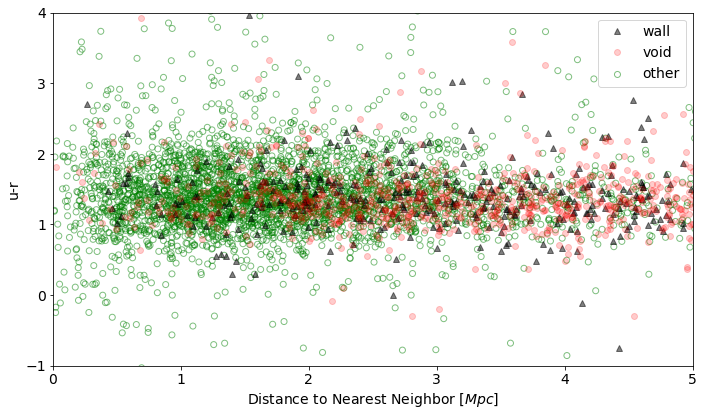

In [41]:
#3D method using h0=75

dwarf_wall = dwarf_table['vflag_VF']==0
dwarf_void = dwarf_table['vflag_VF']==1
dwarf_other = ~(dwarf_wall | dwarf_void)

plt.figure(tight_layout = True)
plt.plot(dwarf_table['3D_group_dist'][dwarf_wall], dwarf_table['u_r'][dwarf_wall], "k^", alpha = 0.5, label = 'wall')
plt.plot(dwarf_table['3D_group_dist'][dwarf_void], dwarf_table['u_r'][dwarf_void], "ro", alpha = 0.2, label = 'void')
plt.scatter(dwarf_table['3D_group_dist'][dwarf_other], dwarf_table['u_r'][dwarf_other], facecolors='none',
            edgecolors='g', alpha = 0.5, label = 'other')
plt.legend()
plt.xlabel('Distance to Nearest Neighbor [$Mpc]$')
plt.ylabel('u-r');
plt.xlim(0, 5)
plt.ylim(-1,4)

3D method using h0=100h

(-1.0, 4.0)

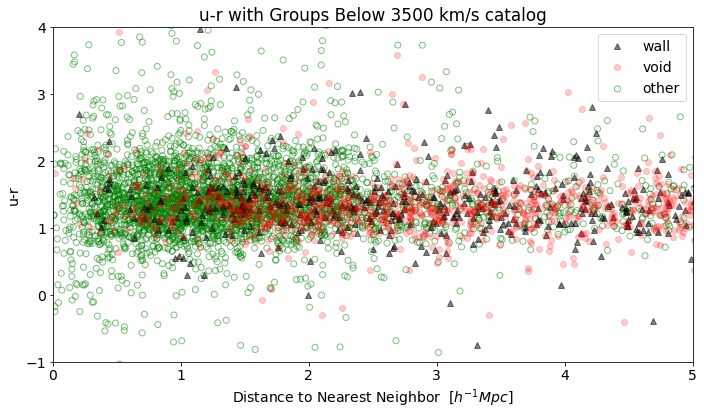

In [40]:
#3D method using h0=100h

dwarf_wall = dwarf_table['vflag_VF']==0
dwarf_void = dwarf_table['vflag_VF']==1
dwarf_other = ~(dwarf_wall | dwarf_void)

plt.figure(tight_layout = True)
plt.plot(dwarf_table['3D_group_dist_h'][dwarf_wall], dwarf_table['u_r'][dwarf_wall], "k^", alpha = 0.5, label = 'wall')
plt.plot(dwarf_table['3D_group_dist_h'][dwarf_void], dwarf_table['u_r'][dwarf_void], "ro", alpha = 0.2, label = 'void')
plt.scatter(dwarf_table['3D_group_dist_h'][dwarf_other], dwarf_table['u_r'][dwarf_other], facecolors='none',
            edgecolors='g', alpha = 0.5, label = 'other')
plt.legend()
plt.xlabel('Distance to Nearest Neighbor  [$h^{-1}Mpc]$')
plt.title('u-r with Groups Below 3500 km/s catalog')
plt.ylabel('u-r');
plt.xlim(0, 5)
plt.ylim(-1,4)

## H0 = 100h Star formation rate plot

(-11.5, -9.0)

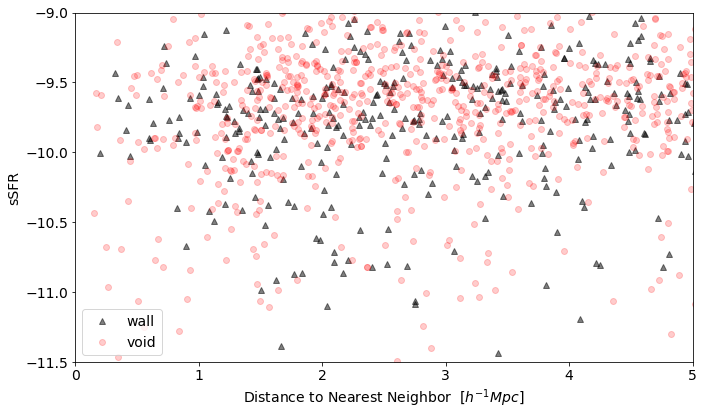

In [33]:
#3D method using h0=100h

dwarf_wall = dwarf_table['vflag_VF']==0
dwarf_void = dwarf_table['vflag_VF']==1
dwarf_other = ~(dwarf_wall | dwarf_void)

plt.figure(tight_layout = True)
plt.plot(dwarf_table['3D_group_dist_h'][dwarf_wall], dwarf_table['sSFR'][dwarf_wall], "k^", alpha = 0.5, label = 'wall')
plt.plot(dwarf_table['3D_group_dist_h'][dwarf_void], dwarf_table['sSFR'][dwarf_void], "ro", alpha = 0.2, label = 'void')
#plt.scatter(dwarf_table['3D_group_dist_h'][dwarf_other], dwarf_table['sSFR'][dwarf_other], facecolors='none',
            #edgecolors='g', alpha = 0.5, label = 'other')
plt.legend()
plt.xlabel('Distance to Nearest Neighbor  [$h^{-1}Mpc]$')
plt.ylabel('sSFR');
plt.xlim(0, 5)
plt.ylim(-11.5,-9)

3D vir using H0=75

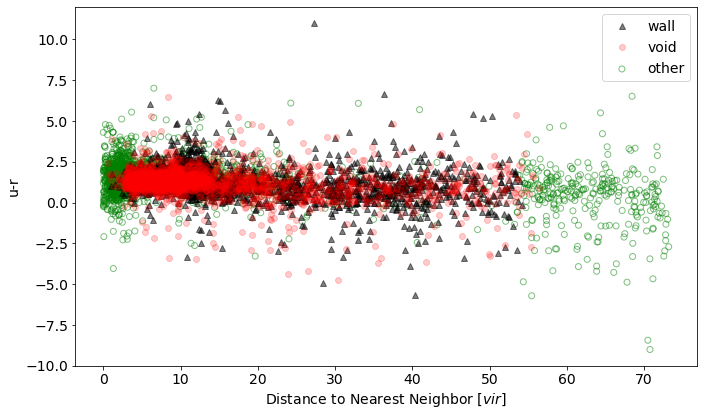

In [34]:
# 3D vir using H0=75

dwarf_wall = dwarf_table['vflag_VF']==0
dwarf_void = dwarf_table['vflag_VF']==1
dwarf_other = ~(dwarf_wall | dwarf_void)

plt.figure(tight_layout = True)
plt.plot(dwarf_table['3D_group_dist_vir'][dwarf_wall], dwarf_table['u_r'][dwarf_wall], "k^", alpha = 0.5, label = 'wall')
plt.plot(dwarf_table['3D_group_dist_vir'][dwarf_void], dwarf_table['u_r'][dwarf_void], "ro", alpha = 0.2, label = 'void')
plt.scatter(dwarf_table['3D_group_dist_vir'][dwarf_other], dwarf_table['u_r'][dwarf_other], facecolors='none',
            edgecolors='g', alpha = 0.5, label = 'other')
plt.legend()
plt.xlabel('Distance to Nearest Neighbor [$vir]$')
plt.ylabel('u-r');
#plt.xlim(0, 20)
#plt.ylim(0,3)

3D vir using H0=100h

(0.0, 3.0)

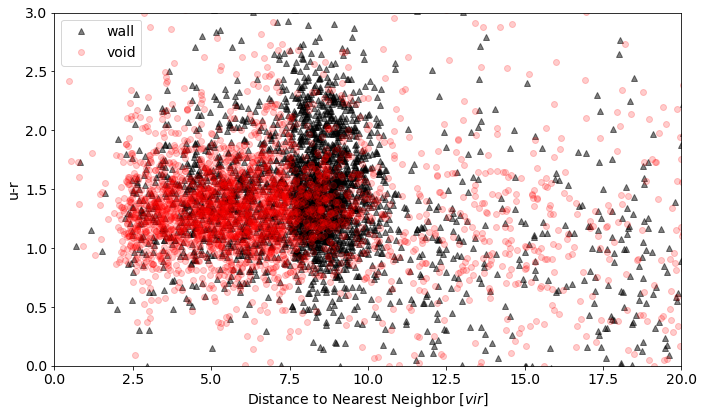

In [64]:
# 3D vir using H0=100h

dwarf_wall = dwarf_table['vflag_VF']==0
dwarf_void = dwarf_table['vflag_VF']==1
dwarf_other = ~(dwarf_wall | dwarf_void)

plt.figure(tight_layout = True)
plt.plot(dwarf_table['3D_group_dist_vir_h'][dwarf_wall], dwarf_table['u_r'][dwarf_wall], "k^", alpha = 0.5, label = 'wall')
plt.plot(dwarf_table['3D_group_dist_vir_h'][dwarf_void], dwarf_table['u_r'][dwarf_void], "ro", alpha = 0.2, label = 'void')
#plt.scatter(dwarf_table['3D_group_dist_vir_h'][dwarf_other], dwarf_table['u_r'][dwarf_other], facecolors='none',
            #edgecolors='g', alpha = 0.5, label = 'other')
plt.legend()
plt.xlabel('Distance to Nearest Neighbor [$vir]$')
plt.ylabel('u-r');
plt.xlim(0, 20)
plt.ylim(0,3)

#### 3D Vir H0=100h (Excluding group with large Rg)

(0.0, 3.0)

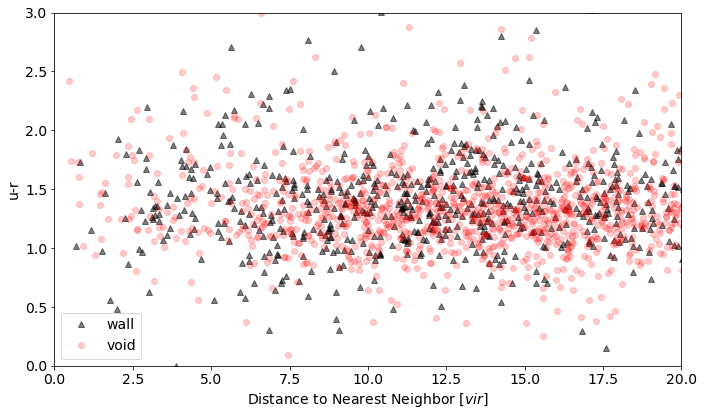

In [65]:
# 3D vir using H0=100h

dwarf_wall = dwarf_table['vflag_VF']==0
dwarf_void = dwarf_table['vflag_VF']==1
dwarf_other = ~(dwarf_wall | dwarf_void)

plt.figure(tight_layout = True)
plt.plot(dwarf_table['3D_group_dist_vir_h_2'][dwarf_wall], dwarf_table['u_r'][dwarf_wall], "k^", alpha = 0.5, label = 'wall')
plt.plot(dwarf_table['3D_group_dist_vir_h_2'][dwarf_void], dwarf_table['u_r'][dwarf_void], "ro", alpha = 0.2, label = 'void')
#plt.scatter(dwarf_table['3D_group_dist_vir_h_2'][dwarf_other], dwarf_table['u_r'][dwarf_other], facecolors='none',
            #edgecolors='g', alpha = 0.5, label = 'other')
plt.legend()
plt.xlabel('Distance to Nearest Neighbor [$vir]$')
plt.ylabel('u-r');
plt.xlim(0, 20)
plt.ylim(0,3)

## Linear Regressions

In [42]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy.stats import binned_statistic

import seaborn as sns

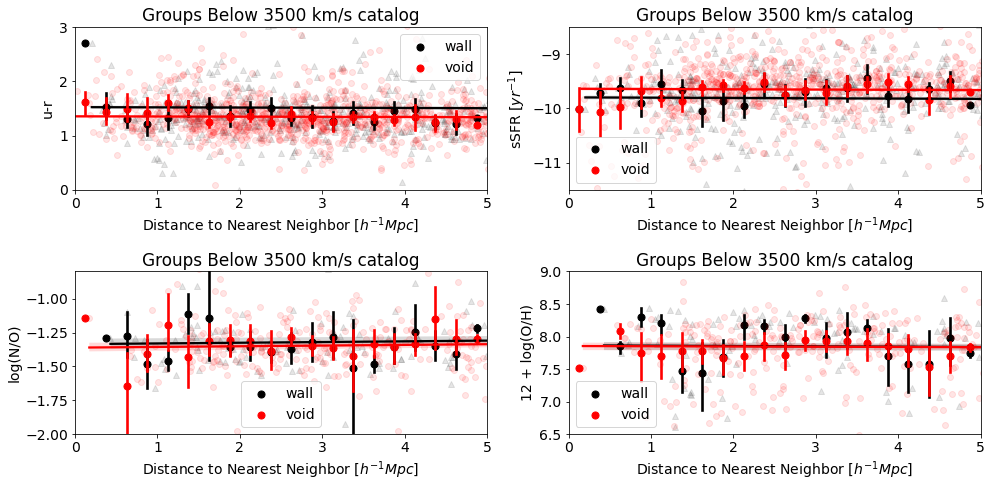

In [57]:
fig, axes = plt.subplots(2,2, figsize=(14,7), tight_layout=True)
axes = axes.flatten()


for select, mc, label, c, m in zip([dwarf_wall, dwarf_void], ['black', 'red'], ['wall', 'void'], ['k', 'r'], ['^', 'o']):
    
    for _name, ax, yl, ylabel in zip(['u_r', 'sSFR', 'logNO', 'Z12logOH'], axes,
                               [(0,3), (-11.5,-8.5), (-2,-0.8),(6.5,9)], 
                                     ['u-r', 'sSFR [$yr^{-1}]$', 'log(N/O)', '12 + log(O/H)']):
        
        d = dwarf_table['3D_group_dist_h'][select]
        vals = dwarf_table[_name][select]
        nonan = ~np.isnan(vals)
       
        ax.scatter(d[nonan], vals[nonan], alpha=0.1, color=c, marker=m)
    
        xedges = np.linspace(0,5,21)
        xcenters = 0.5*(xedges[1:] + xedges[:-1])
        
        sns.regplot(x=d[nonan], y=vals[nonan], x_bins=xcenters, color=mc, ax=ax, label=label)
        
        ax.set(title='Groups Below 3500 km/s catalog', xlabel='Distance to Nearest Neighbor [$h^{-1}Mpc]$', ylabel=ylabel, xlim=(0,5), ylim=yl);
        
        ax.legend()
        
        fig.savefig('3D_group_linear_reg.png')

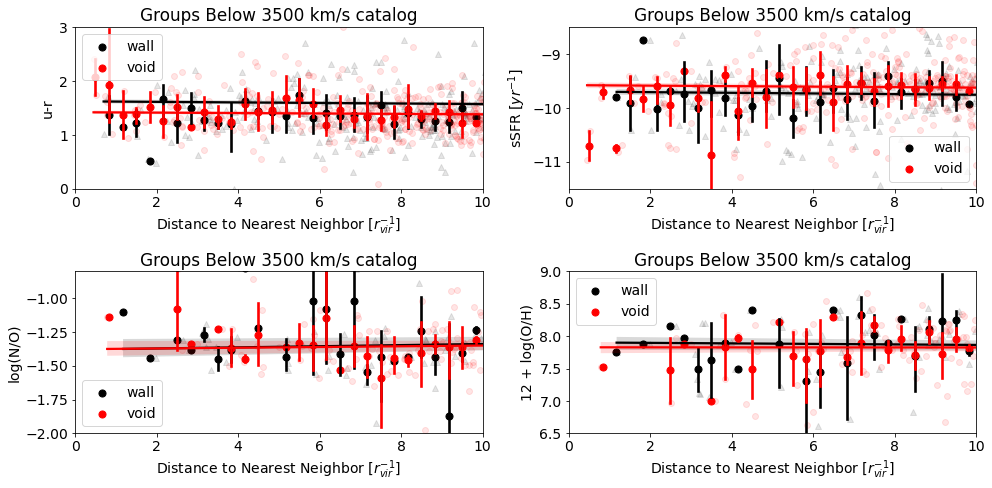

In [78]:
fig, axes = plt.subplots(2,2, figsize=(14,7), tight_layout=True)
axes = axes.flatten()


for select, mc, label, c, m in zip([dwarf_wall, dwarf_void], ['black', 'red'], ['wall', 'void'], ['k', 'r'], ['^', 'o']):
    
    for _name, ax, yl, ylabel in zip(['u_r', 'sSFR', 'logNO', 'Z12logOH'], axes,
                               [(0,3), (-11.5,-8.5), (-2,-0.8),(6.5,9)], 
                                     ['u-r', 'sSFR [$yr^{-1}]$', 'log(N/O)', '12 + log(O/H)']):
        
        d = dwarf_table['3D_group_dist_vir_h_2'][select]
        vals = dwarf_table[_name][select]
        nonan = ~np.isnan(vals)
       
        ax.scatter(d[nonan], vals[nonan], alpha=0.1, color=c, marker=m)
    
        xedges = np.linspace(0,10,31)
        xcenters = 0.5*(xedges[1:] + xedges[:-1])
        
        sns.regplot(x=d[nonan], y=vals[nonan], x_bins=xcenters, color=mc, ax=ax, label=label)
        
        ax.set(title='Groups Below 3500 km/s catalog', xlabel='Distance to Nearest Neighbor [$r^{-1}_{vir}]$',
               ylabel=ylabel, xlim=(0,10), ylim=yl);
        
        ax.legend()
        
        fig.savefig('3D_group_vir_linear_reg.png')

# Profile Histograms


In [70]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy.stats import binned_statistic

In [71]:
def profilehist(x, y, w=None, bins=10, uncertainty='stderr'):
    """Compute a profile histogram given x, y and optional weights.
    
    Parameters
    ----------
    x : (N,) array_like
        Sequence of values to be binned.
    y : (N,) array_like
        Data on which the statistic will be computed.
    w : None or (N,) array_like
        Weights for each data point y.
    bins : int or array_like
        If int, define equal-length bins given by data min/max range; else, user-defined bin edges.
    uncertainty : str
        'stderr' to compute standard error on the mean; 'sample' for sample uncertainty
        
    Returns
    -------
    xc : array of dtype float
        Bin centers in x.
    yavg : array of dtype float
        Average in each bin.
    yerr : array of dtype float
        Uncertainty in each bin (sample error or error on the mean).
    """
    # Default to equal weights in each bin.
    if w is None:
        w = np.ones_like(y, dtype=np.float64)

    # Compute weighted sums and construct the weighted means and uncertainties.
    (Y, E, W), edges, idx = binned_statistic(x, [w*y, w*y**2, w], bins=bins, statistic='sum')
    yavg = Y/W
    ystd = np.sqrt(E/W - yavg**2)
    yerr = ystd/np.sqrt(W)

    # Compute bin centers.
    xc = 0.5*(edges[1:] + edges[:-1])
    
    if uncertainty == 'sample':
        return xc, yavg, ystd
    elif uncertainty == 'stderr':
        return xc, yavg, yerr
    else:
        raise ValueError(f'uncertainty={uncertainty} unknown; allowed: "stderr" and "sample"')

C:\Users\caeho\AppData\Local\Temp\ipykernel_20908\2670135367.py:32: RuntimeWarning: invalid value encountered in true_divide
  yavg = Y/W
C:\Users\caeho\AppData\Local\Temp\ipykernel_20908\2670135367.py:33: RuntimeWarning: invalid value encountered in true_divide
  ystd = np.sqrt(E/W - yavg**2)
C:\Users\caeho\AppData\Local\Temp\ipykernel_20908\2670135367.py:32: RuntimeWarning: invalid value encountered in true_divide
  yavg = Y/W
C:\Users\caeho\AppData\Local\Temp\ipykernel_20908\2670135367.py:33: RuntimeWarning: invalid value encountered in true_divide
  ystd = np.sqrt(E/W - yavg**2)
C:\Users\caeho\AppData\Local\Temp\ipykernel_20908\2670135367.py:32: RuntimeWarning: invalid value encountered in true_divide
  yavg = Y/W
C:\Users\caeho\AppData\Local\Temp\ipykernel_20908\2670135367.py:33: RuntimeWarning: invalid value encountered in true_divide
  ystd = np.sqrt(E/W - yavg**2)
C:\Users\caeho\AppData\Local\Temp\ipykernel_20908\2670135367.py:32: RuntimeWarning: invalid value encountered in tr

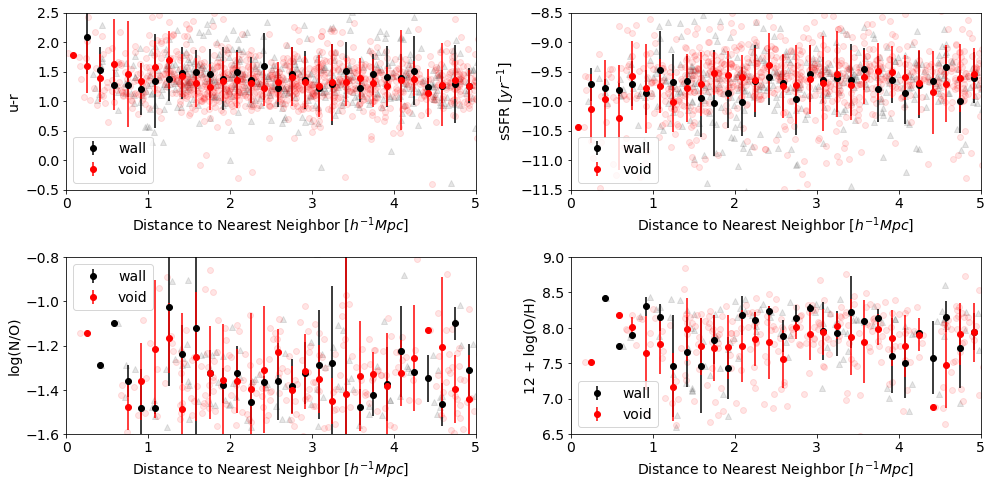

In [79]:
fig, axes = plt.subplots(2,2, figsize=(14,7), tight_layout=True)
axes = axes.flatten()


for select, mc, label, c, m in zip([dwarf_wall, dwarf_void], ['black', 'red'], ['wall', 'void'], ['k', 'r'], ['^', 'o']):
    
    for _name, ax, yl, ylabel in zip(['u_r', 'sSFR', 'logNO', 'Z12logOH'], axes,
                               [(-0.5,2.5), (-11.5,-8.5), (-1.6,-0.8),(6.5,9)], 
                                     ['u-r', 'sSFR [$yr^{-1}]$', 'log(N/O)','12 + log(O/H)']):
        d = dwarf_table['3D_group_dist_h'][select]
        vals = dwarf_table[_name][select]
        nonan = ~np.isnan(vals)
        #print(_name, np.sum(nonan))

        xc, yavg, yerr = profilehist(d[nonan], vals[nonan], bins=np.linspace(0,5,31), uncertainty='sample')
        ax.scatter(d[nonan], vals[nonan], alpha=0.1, color=c, marker=m)
        ax.errorbar(xc, yavg, yerr=yerr, fmt='o', color=mc, label=label)
        ax.set(xlabel='Distance to Nearest Neighbor [$h^{-1}Mpc]$', ylabel=ylabel, xlim=(0,5), ylim=yl);
        ax.legend()
        
        #fig.savefig('3D_group_profile_hists.png')

C:\Users\caeho\AppData\Local\Temp\ipykernel_20908\2670135367.py:32: RuntimeWarning: invalid value encountered in true_divide
  yavg = Y/W
C:\Users\caeho\AppData\Local\Temp\ipykernel_20908\2670135367.py:33: RuntimeWarning: invalid value encountered in true_divide
  ystd = np.sqrt(E/W - yavg**2)
C:\Users\caeho\AppData\Local\Temp\ipykernel_20908\2670135367.py:32: RuntimeWarning: invalid value encountered in true_divide
  yavg = Y/W
C:\Users\caeho\AppData\Local\Temp\ipykernel_20908\2670135367.py:33: RuntimeWarning: invalid value encountered in true_divide
  ystd = np.sqrt(E/W - yavg**2)
C:\Users\caeho\AppData\Local\Temp\ipykernel_20908\2670135367.py:32: RuntimeWarning: invalid value encountered in true_divide
  yavg = Y/W
C:\Users\caeho\AppData\Local\Temp\ipykernel_20908\2670135367.py:33: RuntimeWarning: invalid value encountered in true_divide
  ystd = np.sqrt(E/W - yavg**2)
C:\Users\caeho\AppData\Local\Temp\ipykernel_20908\2670135367.py:32: RuntimeWarning: invalid value encountered in tr

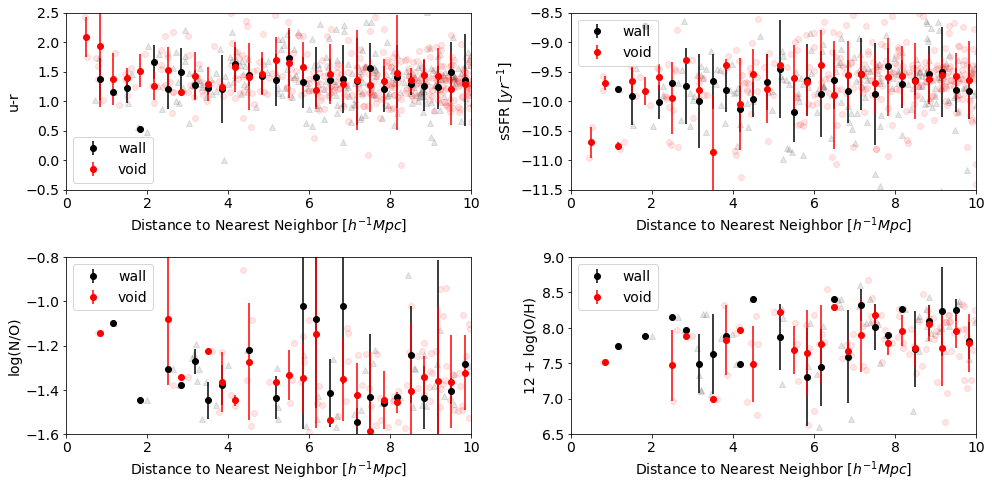

In [80]:
fig, axes = plt.subplots(2,2, figsize=(14,7), tight_layout=True)
axes = axes.flatten()


for select, mc, label, c, m in zip([dwarf_wall, dwarf_void], ['black', 'red'], ['wall', 'void'], ['k', 'r'], ['^', 'o']):
    
    for _name, ax, yl, ylabel in zip(['u_r', 'sSFR', 'logNO', 'Z12logOH'], axes,
                               [(-0.5,2.5), (-11.5,-8.5), (-1.6,-0.8),(6.5,9)], 
                                     ['u-r', 'sSFR [$yr^{-1}]$', 'log(N/O)','12 + log(O/H)']):
        d = dwarf_table['3D_group_dist_vir_h_2'][select]
        vals = dwarf_table[_name][select]
        nonan = ~np.isnan(vals)
        #print(_name, np.sum(nonan))

        xc, yavg, yerr = profilehist(d[nonan], vals[nonan], bins=np.linspace(0,10,31), uncertainty='sample')
        ax.scatter(d[nonan], vals[nonan], alpha=0.1, color=c, marker=m)
        ax.errorbar(xc, yavg, yerr=yerr, fmt='o', color=mc, label=label)
        ax.set(xlabel='Distance to Nearest Neighbor [$h^{-1}Mpc]$', ylabel=ylabel, xlim=(0,10), ylim=yl);
        ax.legend()
        
        #fig.savefig('3D_group_vir_profile_hists.png')